In [1]:
import pandas as pd

In [2]:
# Load Dataset
df = pd.read_csv(
    "./datasets/cicids-2017-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
)

FileNotFoundError: [Errno 2] No such file or directory: './datasets/cicids-2017-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

In [5]:
# Display Basic Info
print("Info\n",df.info())
print("Describe\n",df.describe())
print("Head\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

/home/aayush/Study/cc/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/aayush/Study/cc/env/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Describe
         Destination Port   Flow Duration   Total Fwd Packets  \
count       225745.00000    2.257450e+05       225745.000000   
mean          8879.61946    1.624165e+07            4.874916   
std          19754.64740    3.152437e+07           15.422874   
min              0.00000   -1.000000e+00            1.000000   
25%             80.00000    7.118000e+04            2.000000   
50%             80.00000    1.452333e+06            3.000000   
75%             80.00000    8.805237e+06            5.000000   
max          65532.00000    1.199999e+08         1932.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            225745.000000                225745.000000   
mean                  4.572775                   939.463346   
std                  21.755356                  3249.403484   
min                   0.000000                     0.000000   
25%                   1.000000                    26.000000   
50%                   4.000000     

In [6]:
# Check for missing values & duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
2633


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

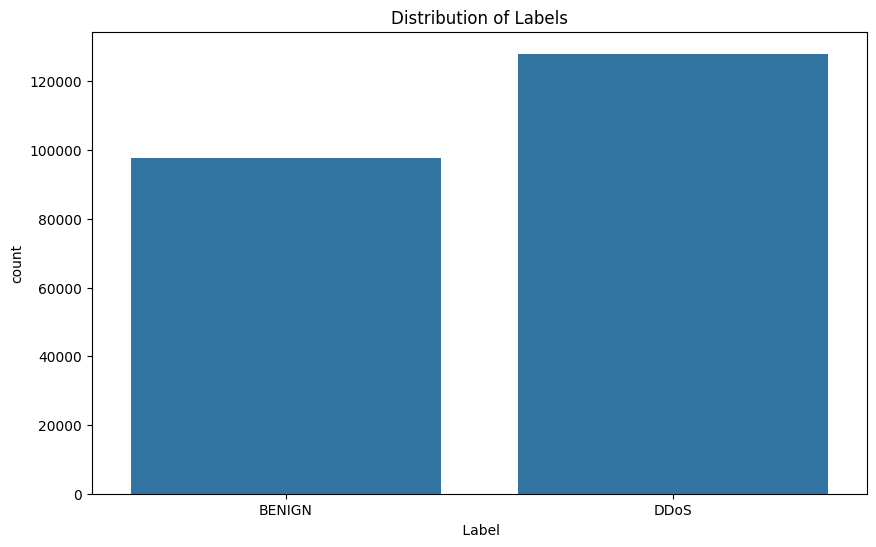

In [8]:
# Check column names
# print(df.columns)

# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=' Label', data=df)  # Note the space before 'Label'
plt.title('Distribution of Labels')
plt.show()

/tmp/ipykernel_27419/1673573074.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[' Label'] = df[' Label'].replace({'BENIGN': 0, 'DDoS': 1})


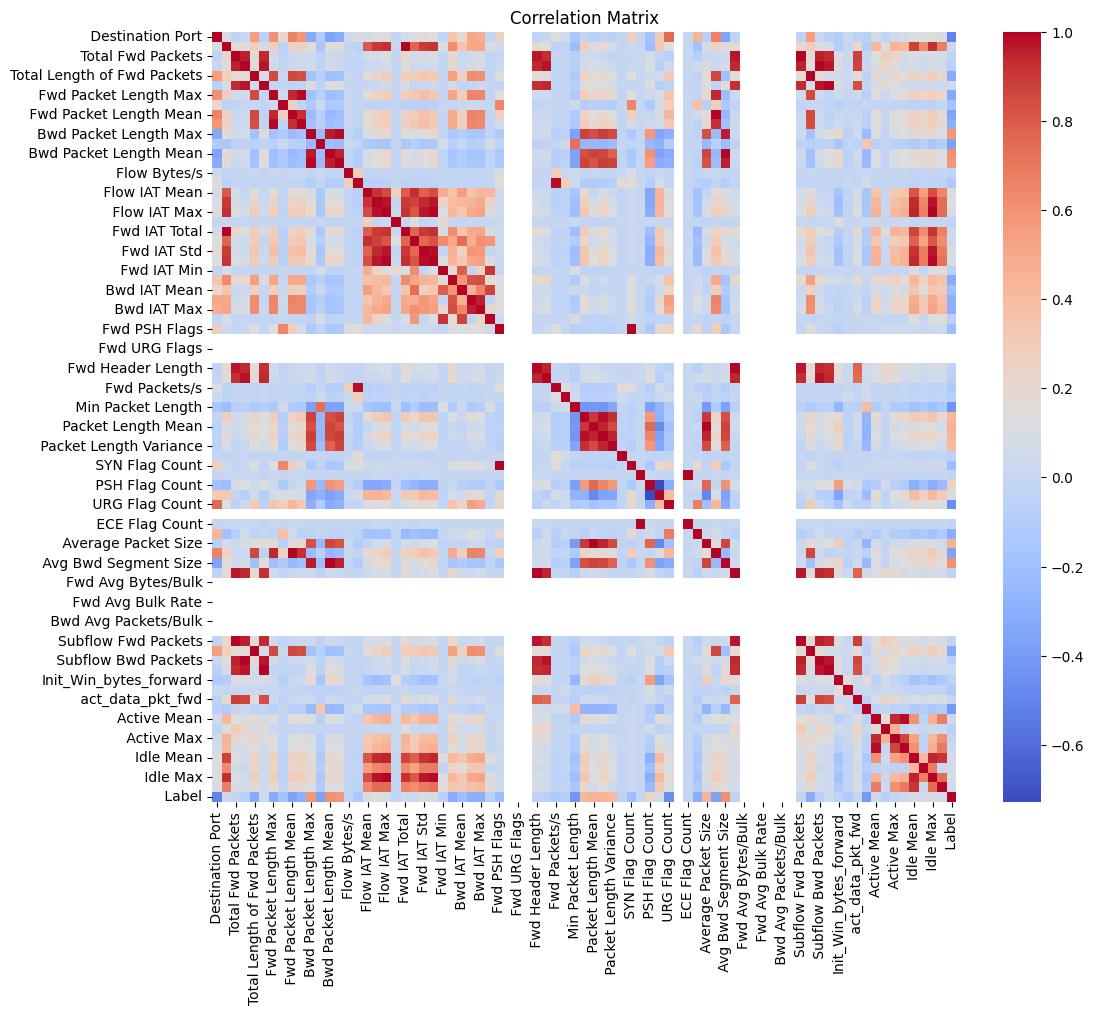

In [9]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
df[' Label'] = df[' Label'].replace({'BENIGN': 0, 'DDoS': 1})
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')  # Convert to smaller float type

print(df.info())  # Check reduced memory usage


<class 'pandas.core.frame.DataFrame'>
Index: 223112 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             223112 non-null  float32
 1    Flow Duration                223112 non-null  float64
 2    Total Fwd Packets            223112 non-null  float32
 3    Total Backward Packets       223112 non-null  float32
 4   Total Length of Fwd Packets   223112 non-null  float32
 5    Total Length of Bwd Packets  223112 non-null  float32
 6    Fwd Packet Length Max        223112 non-null  float32
 7    Fwd Packet Length Min        223112 non-null  float32
 8    Fwd Packet Length Mean       223112 non-null  float32
 9    Fwd Packet Length Std        223112 non-null  float32
 10  Bwd Packet Length Max         223112 non-null  float32
 11   Bwd Packet Length Min        223112 non-null  float32
 12   Bwd Packet Length Mean       223112 non-null  fl

#### Min Max Normalization

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


#### Z-Score Normalization

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


Apply PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 principal components
df_pca = pca.fit_transform(df_standardized)

# Convert back to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
print(df_pca.head())


        PC1       PC2
0 -2.336164 -2.682722
1 -1.953825 -2.758280
2 -1.966679 -2.777915
3 -2.015781 -2.733621
4 -2.336170 -2.682720


#### Visualize PCA results

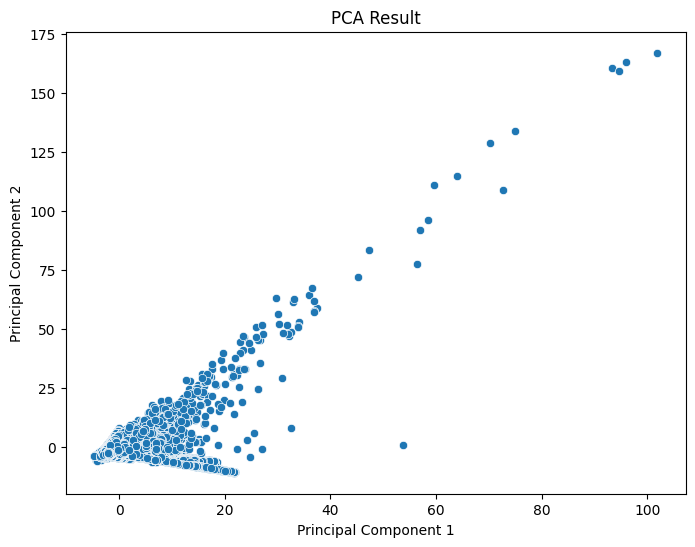

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result")
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=df.columns[0:-1])

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [51]:
from sklearn.svm import SVC

svc=SVC()

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [24]:
models = {
    "Logistic Regression": lr,
    "Support Vector Machine": svc,
    "Random Forest": rf,
    "Decision Tree": dtc,
    "K-Nearest Neighbors": knn
}

In [ ]:
results = {}

for name, model in models.items():
    if isinstance(model, tuple):
        model = model[0]  # Extract the model from the tuple
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted"),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

In [27]:
results

NameError: name 'results' is not defined

This tells us that random forest is the best model for this dataset.
closely followed by decision tree.
Due to the ease of interpretation of decision tree, we go forward with decision tree.

## Feature Selection

In [ ]:
# re-train dtc model
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
feature_importances = dtc.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

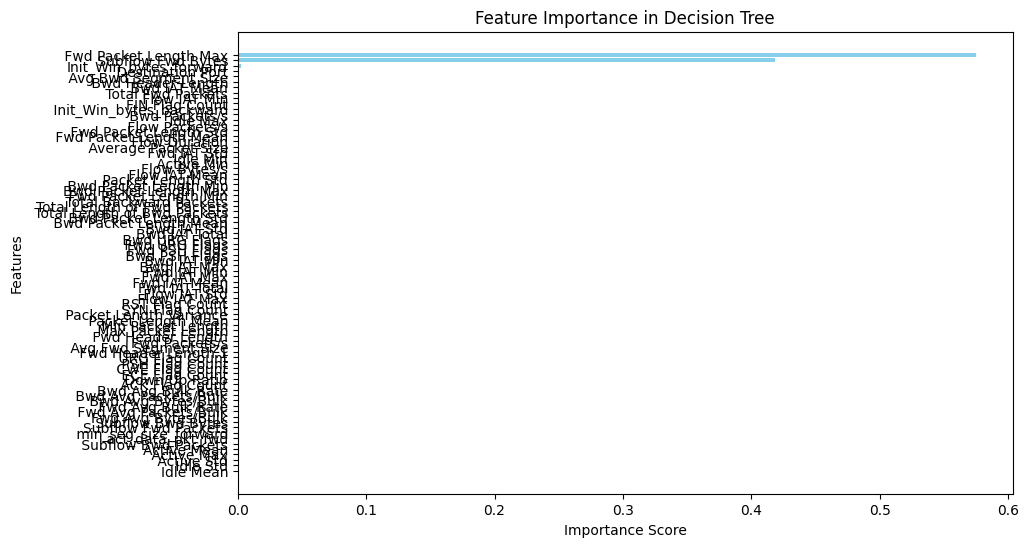

In [59]:
# Plot feature importance
plt.figure(figsize=(10, 6)) #plt.figure(figsize=(10, 20)) for easy reading
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()
plt.show()

In [60]:
print(feature_importance_df.head(10))  # Show top 10 features

                   Feature  Importance
6    Fwd Packet Length Max    0.574990
63       Subflow Fwd Bytes    0.418670
66  Init_Win_bytes_forward    0.002302
0         Destination Port    0.001067
54    Avg Bwd Segment Size    0.000812
35       Bwd Header Length    0.000368
26            Bwd IAT Mean    0.000343
2        Total Fwd Packets    0.000248
19            Flow IAT Min    0.000239
43          FIN Flag Count    0.000232


In [62]:
len(feature_importance_df)

78

In [67]:
from sklearn.feature_selection import RFE

dtc=DecisionTreeClassifier()


# Apply Recursive Feature Elimination
rfe = RFE(dtc, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get selected feature names
selected_features = X_train_df.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index([' Destination Port', ' Fwd Packet Length Max', ' Flow IAT Mean',
       ' Flow IAT Min', ' Fwd IAT Min', 'FIN Flag Count',
       ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward'],
      dtype='object')
